# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income'],
      dtype='object')

In [3]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

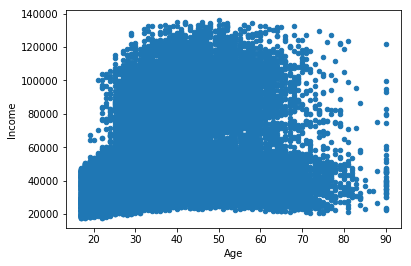

In [4]:
income.plot(x='Age', y='Income', kind='scatter')

In [5]:
# import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# Initialize
clf = LinearRegression()

In [7]:
#Set a new dataframe only with Age and Income fields
income_2 = income[['Income','Age']]
a=np.array(income_2,dtype=int)
income_2.columns

Index(['Income', 'Age'], dtype='object')

In [8]:
x=a[:,1]
y=a[:,0]

In [9]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [10]:
clf.fit(X_train[:, None], y_train)
y_new = clf.predict(X_test[:, None])

print('Coeficiente: ', clf.coef_)
print('Intercepto: ', clf.intercept_)

Coeficiente:  [ 543.88698099]
Intercepto:  32654.4463842


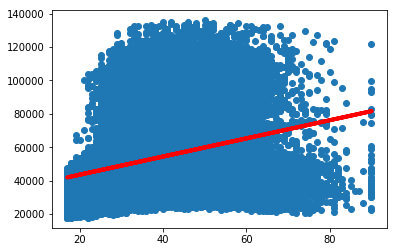

In [11]:
plt.scatter(x.ravel(), y)
plt.style.use('fivethirtyeight')
plt.plot(X_test.ravel(), y_new,c='r')

$$Income = 32654.446384156312 +543.88698099 \ *Age$$

- Ingresos y Edad son directamente proporcionales, siendo la edad la variable independiente en este modelo.


In [12]:
increment = (clf.intercept_ + (clf.coef_/100)) - clf.intercept_
print ('Incremento del ingreso por un 1% de aumento en la edad: ', float(increment))

Incremento del ingreso por un 1% de aumento en la edad:  5.438869809906464


In [13]:
print('Ingreso persona de 30 años = ', float(clf.intercept_ + clf.coef_*30))
print('Ingreso persona de 40 años = ', float(clf.intercept_ + clf.coef_*40))

Ingreso persona de 30 años =  48971.05581387406
Ingreso persona de 40 años =  54409.925623779985


# Exercise 2.2
Evaluate the model using the MSE

In [14]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_new))
print('MSE:', metrics.mean_squared_error(y_test, y_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))

MSE: 584771569.694
RMSE: 24182.0505684


El valor 24182.05 correpondiente de la raíz del error cuadrático medio, indíca que el modelo presenta un error en las predicciones que puede considerarse alto.


# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [22]:
income_3 = income_2[['Age','Income']].copy()
income_3['Age2'] = income_3['Age']**2
income_3.head()

,Age,Income,Age2
0,39,51806.0,1521
1,50,68719.0,2500
2,38,51255.0,1444
3,53,47398.0,2809
4,28,30493.0,784


In [26]:
X = income_3[['Age','Age2']]
y = income_3['Income']
X = np.array(X,dtype=int)
y = np.array(y,dtype=int)

### Using OLS

In [27]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

In [29]:
# Fit
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [30]:
linreg.coef_

array([ 2353.59726556,   -22.02285828])

In [31]:
X_test = pd.DataFrame(X_test)
X_test.columns = ['Age', 'Age2']

In [32]:
y_pred = linreg.predict(X_test[['Age', 'Age2']])

In [33]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 18446.9909437
MSE: 542868294.851
RMSE: 23299.5342196


### Using Gradient Descent

In [34]:
# import
from sklearn.linear_model import SGDRegressor

Text(0,0.5,'Income')

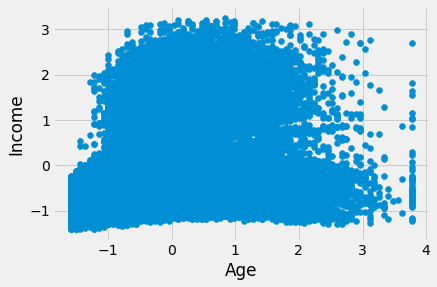

In [35]:
x1 = income_3['Age'].values
y1 = income_3['Income']

y_mean, y_std = y1.mean(), y1.std()
X_mean, X_std = x1.mean(), x1.std()

y = (y1 - y_mean)/ y_std
X = (x1 - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Income')


In [36]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

In [39]:
X=income_3[['Age', 'Age2']].values
X[0:5]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       [  53, 2809],
       [  28,  784]], dtype=int64)

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))#ss.fit=Compute the mean and standard deviation to be used for later scaling. astype= copy of the array to a pecified type
X = ss.transform(X.astype(np.float))#ss.transform=Perfom standardization by centering and scaling
ss.mean_, ss.scale_
X[0:5]

array([[ 0.03067056, -0.13027593],
       [ 0.83710898,  0.70006807],
       [-0.04264203, -0.19558388],
       [ 1.05704673,  0.96214804],
       [-0.77576787, -0.75536635]])

In [41]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.13027593],
       [ 1.        ,  0.83710898,  0.70006807],
       [ 1.        , -0.04264203, -0.19558388],
       [ 1.        ,  1.05704673,  0.96214804],
       [ 1.        , -0.77576787, -0.75536635]])

In [42]:
# Initialize
linreg2 = SGDRegressor(max_iter=10000)

In [43]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
# Fit
linreg2.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [45]:
linreg2.coef_

array([ 1.67112303, -1.41737084])

In [46]:
X_test

array([[ 1.71685999,  1.83998874],
       [-1.5088937 , -1.14551777],
       [-0.99570562, -0.89022304],
       ..., 
       [-0.77576787, -0.75536635],
       [ 0.47054606,  0.29719432],
       [-1.43558112, -1.11413603]])

In [47]:
y_pred2= linreg2.predict(X_test) * y_std + y_mean
y_pred2

array([ 60269.58664565,  30753.47291821,  43378.08914878, ...,
        47870.23693121,  62917.18468394,  32740.66992871])

In [48]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 53587.2402071
MSE: 2971873397.02
RMSE: 54514.8915162


# Exercise 2.4

Estimate a regression using more features.

How is the performance compared to using only the Age?

In [95]:
x = income[['Age','fnlwgt','Education-Num','Hours per week']]
y = income['Income']

In [96]:
x = np.array(x,dtype=int)
y = np.array(y,dtype=int)

### Using OLS

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [98]:
X_test= pd.DataFrame(X_test)
X_test.columns = ['Age','fnlwgt','Education-Num','Hours per week']

In [99]:
# Initialize
linreg3 = LinearRegression(fit_intercept=False)

In [100]:
# Fit
linreg3.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [101]:
linreg3.coef_

array([  3.70306186e+02,  -9.75193080e-03,   2.99794876e+03,
         2.71126493e+02])

In [102]:
y_pred3= linreg3.predict(X_test[['Age','fnlwgt','Education-Num','Hours per week']])

In [103]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 16917.9628303
MSE: 463421704.871
RMSE: 21527.2317048


Respecto al punto anterior (MAE:18446.9909437, MSE:542868294.851,RMSE: 23299.5342196) las predicciones presentanun error un poco más bajo, sin embargo sigue representando un valor alto.

### Using Gradient Descent

In [104]:
# Initialize
linreg4 = SGDRegressor(max_iter=10000)

In [105]:
x1 = income[['Age','fnlwgt','Education-Num','Hours per week']].values
y1=y

y_mean, y_std = y1.mean(), y1.std()
X_mean, X_std = x1.mean(), x1.std()

y = (y1 - y_mean)/ y_std
X = (x1 - X_mean)/ X_std

In [106]:
X = income[['Age','fnlwgt','Education-Num','Hours per week']].values
X[0:5]

array([[    39,  77516,     13,     40],
       [    50,  83311,     13,     13],
       [    38, 215646,      9,     40],
       [    53, 234721,      7,     40],
       [    28, 338409,     13,     40]], dtype=int64)

In [107]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))#ss.fit=Compute the mean and standard deviation to be used for later scaling. astype= copy of the array to a pecified type
X = ss.transform(X.astype(np.float))#ss.transform=Perfom standardization by centering and scaling
ss.mean_, ss.scale_
X[0:5]

array([[ 0.03067056, -1.06361075,  1.13473876, -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.03542945],
       [ 1.05704673,  0.42580136, -1.19745882, -0.03542945],
       [-0.77576787,  1.40817572,  1.13473876, -0.03542945]])

In [108]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

In [109]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [110]:
# Fit
linreg4.fit(X_test, y_test)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [111]:
X_test

array([[ 1.71685999, -1.54305923, -2.36355761,  2.07030446],
       [-1.5088937 ,  0.17361363, -1.19745882, -1.25027593],
       [-0.99570562, -0.82713146,  1.13473876,  0.77446821],
       ..., 
       [-0.77576787, -0.78203365, -0.80875922, -0.03542945],
       [ 0.47054606, -0.03131613, -0.42005962, -0.03542945],
       [-1.43558112,  1.22260201, -0.03136003, -0.03542945]])

In [112]:
linreg4.coef_

array([ 0.2585086 ,  0.01481567,  0.38760228,  0.19290687])

In [113]:
y_pred4= linreg4.predict(X_test) * y_std + y_mean
y_pred4

array([ 50596.03208518,  25206.48252543,  61173.16506706, ...,
        39476.48115049,  51800.74531337,  43562.47278821])

In [114]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 52842.1401828
MSE: 2978280851.5
RMSE: 54573.6278023


Respecto al modelo donde solo se usó la variable Edad, se obtiene un error un poco menor. Las variables del segundo modelo fueron elegidas arbitrariamente, por lo que quizás es posible mejorar las prediccones al hacer una análisis de cuales son las variable más importantes.

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

## Logistic Regression

In [140]:
income_5 = pd.DataFrame(income, columns=['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num','Martial Status','Occupation','Relationship','Race','Sex','Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income','UnitedStates'])
income_5['in_UnitedStates']=(income['Country'] == 'United-States')*1.0
income_5['in_UnitedStates'].value_counts()

1.0    29170
0.0     3391
Name: in_UnitedStates, dtype: int64

In [141]:
workclass = pd.DataFrame(pd.get_dummies(income_5['Workclass']))
education=pd.DataFrame(pd.get_dummies(income_5['Education']))
martial_Status=pd.DataFrame(pd.get_dummies(income_5['Martial Status']))
occupation=pd.DataFrame(pd.get_dummies(income_5['Occupation']))
sex=pd.DataFrame(pd.get_dummies(income_5['Sex']))
race=pd.DataFrame(pd.get_dummies(income_5['Race']))
relationship=pd.DataFrame(pd.get_dummies(income_5['Relationship']))

In [142]:
income_num = pd.DataFrame(income_5, columns=['Age','fnlwgt','Education-Num', 'Hours per week','Income','in_UnitedStates'])
income_total=pd.concat([income_num,workclass,education,martial_Status,occupation,sex,race,relationship],axis=1)
income_total.columns

Index(['Age', 'fnlwgt', 'Education-Num', 'Hours per week', 'Income',
       'in_UnitedStates', 'Federal-gov', 'Local-gov', 'Never-worked',
       'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       'Without-pay', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th',
       '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces',
       'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
       'Tech-support', 'Transport-moving', 'Female', 'Male',
       'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unm

In [143]:
x= income_total[['Age', 'fnlwgt', 'Education-Num', 'Hours per week', 'Income',
                'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
                'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '10th',
                '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
                'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
                'Preschool', 'Prof-school', 'Some-college', 'Divorced',
                'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
                'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces',
                'Craft-repair', 'Exec-managerial', 'Farming-fishing',
                'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
                'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
                'Tech-support', 'Transport-moving', 'Female', 'Male',
                'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
                'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried','Wife']]
y=income_total['in_UnitedStates']

In [144]:
x.shape

(32561, 63)

In [146]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#Se aplica una reducción al modelo a 18 variables 
rfe = RFE(logreg, 18)
rfe = rfe.fit(x, y)

#Las variables marcadas con 1 son las escogidas
print(rfe.ranking_)

[42 46 32 44 45  7  6 16 22 21 34  1  9 24 23  1  1  1  1  1 19 13 35  1 14
 30  1 31 15  3  1 17  1 41 29  2 38  8 43 25 33 12 10  5  1 36 39 20 26  1
 40 28  1  1  1  1  1 18 27  1  4 11 37]


In [147]:
#Varaibles seleccionadas
x=income_total[['State-gov','12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm','Doctorate', 'HS-grad', 'Masters',
                'Preschool','Married-AF-spouse','Married-spouse-absent','Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
                'Transport-moving','Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White','Other-relative']]

In [148]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [149]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [151]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=100, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("100-fold cross validation average accuracy: %.3f" % (results.mean()))

100-fold cross validation average accuracy: 0.918


In [156]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 281  569]
 [ 117 7174]]


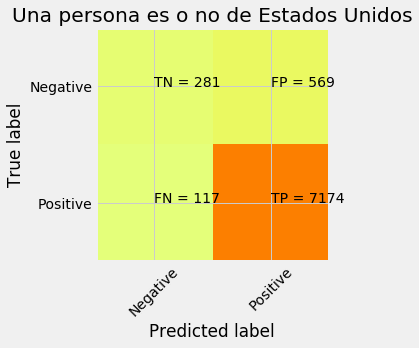

In [162]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Una persona es o no de Estados Unidos')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

- El modelo predijo que 569 personas son de Estados Unidos pero en realidad no lo son y también predijo que 117 personas no eran de Estados Unidos a pesar de que sí lo eran. Acertó en la predicción de que 7174 personas que son de Estados Unidos en 281 que no lo son.

In [163]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.690239
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        in_UnitedStates   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32557
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Jun 2018   Pseudo R-squ.:                  -1.066
Time:                        21:46:43   Log-Likelihood:                -22475.
converged:                       True   LL-Null:                       -10878.
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0096      0.011      0.858      0.391      -0.012       0.032
x2            -0.0872      0.

# Recall, Precision and F1-Score

Intuitively, [precision](http://en.wikipedia.org/wiki/Precision_and_recall#Precision) is the ability
of the classifier not to label as positive a sample that is negative, and
[recall](http://en.wikipedia.org/wiki/Precision_and_recall#Recall) is the
ability of the classifier to find all the positive samples.

The  [F-measure](http://en.wikipedia.org/wiki/F1_score>)
($F_\beta$ and $F_1$ measures) can be interpreted as a weighted
harmonic mean of the precision and recall. A
$F_\beta$ measure reaches its best value at 1 and its worst score at 0.
With $\beta = 1$,  $F_\beta$ and
$F_1$  are equivalent, and the recall and the precision are equally important.

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.71      0.33      0.45       850
        1.0       0.93      0.98      0.95      7291

avg / total       0.90      0.92      0.90      8141



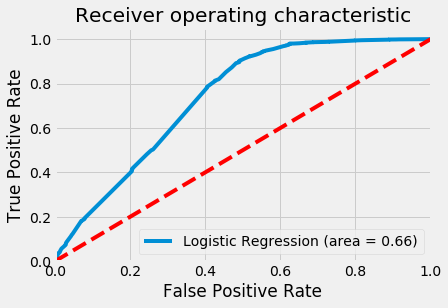

In [165]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()